In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-42af789d-329a-0674-d4ca-d4e8ccfec152)


In [ ]:
# выбираем gpu-device с индексом 0 => tesla t4
%env CUDA_VISIBLE_DEVICES=0


env: CUDA_VISIBLE_DEVICES=0


### **installation**

In [ ]:
!pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.2 MB/s eta 0:00:00


In [ ]:
!pip install hsemotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.7 MB/s eta 0:00:00
  Created wheel for hsemotion: filename=hsemotion-0.3.0-py3-none-any.whl size=11242 sha256=d2619328f811f9c17bfba56c3a948a2c56b3a13d250ee7c01b84a6511b17eebd
  Stored in directory: /root/.cache/pip/wheels/38/88/e0/3b365122443c2ec55f3e058f2b7ad59df7b5e302c457c4539a
Successfully built hsemotion


In [ ]:
!pip install hsemotion-onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.5 MB/s eta 0:00:00
  Created wheel for hsemotion-onnx: filename=hsemotion_onnx-0.3.1-py3-none-any.whl size=11114 sha256=4699af9426e71d823bd198b1203d794033526fa2037b6310b084e94c9a572364
  Stored in directory: /root/.cache/pip/wheels/52/e3/e4/159edf450e21bea9099bbd4879cb00d8265f6f612ec03b2425
Successfully built hsemotion-onnx


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torch
import facenet_pytorch

%matplotlib inline

In [ ]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

#Do not forget to run pip install facenet-pytorch
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)

def detect_face(frame):
    bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
    bounding_boxes=bounding_boxes[probs>0.9]
    return bounding_boxes

print(use_cuda)

True


## **ContraCLIP_0205**

### **ContraCLIP_0205**
### **model_name='enet_b0_8_best_vgaf''**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b0_8_best_vgaf.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
# переименовываем файлы из папок emotions, чтобы далее было удобно ставить labels

import os
folder_contraclip = "/content/gdrive/MyDrive/uni/ContraCLIP_0205"
emotions = ['angry', 'disgust', 'happy', 'neutral', 'sad', 'surprise', 'contempt', 'fear']

for folder in emotions:
  # print(folder)
  enumerate_ph = 0
  for filename in os.listdir(os.path.join(folder_contraclip, folder)):
    # print(filename)
    if os.path.isfile(os.path.join(folder_contraclip, folder, filename)):
      enumerate_ph += 1
      os.rename(os.path.join(folder_contraclip, folder, filename), os.path.join(folder_contraclip, folder, f'{enumerate_ph}_{folder}.jpg'))



In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/ContraCLIP_0205"
with open("/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:
# заполняем список названий изображений, которые прошли детектор эмоций и в соответствующей строчке в файле .txt проставляем id эмоции (формируем множество y_pred)
import numpy as np
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/ContraCLIP_0205"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[7]).split('.')[0])
        print((img_path.split('/')[7]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            face_img_list.append(face_img)




1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
27_angry
9_angry
10_angry
43_angry
55_angry
13_angry
61_angry
25_angry
44_angry
56_angry
18_angry
19_angry
26_angry
58_angry
57_angry
23_angry
24_angry
40_angry
59_angry
8_angry
28_angry
29_angry
60_angry
31_angry
41_angry
33_angry
34_angry
35_angry
36_angry
42_angry
38_angry
39_angry
15_angry
32_angry
37_angry
11_angry
16_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
53_angry
54_angry
12_angry
17_angry
22_angry
21_angry
20_angry
30_angry
14_angry
62_angry
63_angry
1_contempt
2_contempt
3_contempt
4_contempt
5_contempt
6_contempt
7_contempt
8_contempt
9_contempt
10_contempt
11_contempt
12_contempt
13_contempt
14_contempt
15_contempt
16_contempt
17_contempt
18_contempt
19_contempt
20_contempt
21_contempt
22_contempt
23_contempt
24_contempt
25_contempt
26_contempt
27_contempt
28_contempt
29_contempt
30_contempt
31_contempt
32_contempt
33_contempt
34_contempt
35_contempt
36_contempt
1_disgust
2_disgust

In [ ]:
print(img_paths_accord)
img_path

['1_angry', '2_angry', '3_angry', '4_angry', '5_angry', '6_angry', '7_angry', '27_angry', '9_angry', '10_angry', '43_angry', '55_angry', '13_angry', '61_angry', '25_angry', '44_angry', '56_angry', '18_angry', '19_angry', '26_angry', '58_angry', '57_angry', '23_angry', '24_angry', '40_angry', '59_angry', '8_angry', '28_angry', '29_angry', '60_angry', '31_angry', '41_angry', '33_angry', '34_angry', '35_angry', '36_angry', '42_angry', '38_angry', '39_angry', '15_angry', '32_angry', '37_angry', '11_angry', '16_angry', '45_angry', '46_angry', '47_angry', '48_angry', '49_angry', '50_angry', '51_angry', '52_angry', '53_angry', '54_angry', '12_angry', '17_angry', '22_angry', '21_angry', '20_angry', '30_angry', '14_angry', '62_angry', '63_angry', '1_contempt', '2_contempt', '3_contempt', '4_contempt', '5_contempt', '6_contempt', '7_contempt', '8_contempt', '9_contempt', '10_contempt', '11_contempt', '12_contempt', '13_contempt', '14_contempt', '15_contempt', '16_contempt', '17_contempt', '18_co

In [ ]:
# проверка размера изображений

# import cv2
# from google.colab.patches import cv2_imshow
# for img in face_img_list:
#   # img_i = Image.open(img)
#   print(img.size)
# for img in face_img_list:
#   # img_i = Image.open(img)
#   cv2_imshow(img)

In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/ContraCLIP_0205"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[7]).split('.')[0])
        print((img_path.split('/')[7]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])


1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
27_angry
9_angry
10_angry
43_angry
55_angry
13_angry
61_angry
25_angry
44_angry
56_angry
18_angry
19_angry
26_angry
58_angry
57_angry
23_angry
24_angry
40_angry
59_angry
28_angry
29_angry
60_angry
31_angry
41_angry
33_angry
34_angry
35_angry
36_angry
42_angry
38_angry
39_angry
32_angry
37_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
53_angry
54_angry
22_angry
21_angry
20_angry
30_angry
62_angry
63_angry
1_contempt
2_contempt
3_contempt
4_contempt
5_contempt
6_contempt
7_contempt
8_contempt
9_contempt
10_contempt
11_contempt
12_contempt
13_contempt
14_contempt
15_contempt
16_contempt
17_contempt
18_contempt
19_contempt
20_contempt
21_contempt
22_contempt
23_contempt
24_contempt
25_contempt
26_contempt
27_contempt
28_contempt
29_contempt
30_contempt
31_contempt
32_contempt
33_contempt
34_contempt
35_contempt
36_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust (1)
44_disgust
51_dis

In [ ]:
# print(face_img_list[0:10])

# emotions1,scores1=fer.predict_multi_emotions(face_img_list[0:100],logits=False)
# emotions2,scores2=fer.predict_multi_emotions(face_img_list[100:250],logits=False)
# emotions3,scores3=fer.predict_multi_emotions(face_img_list[250:450],logits=False)
# emotions4,scores4=fer.predict_multi_emotions(face_img_list[450:550],logits=False)
# emotions5,scores5=fer.predict_multi_emotions(face_img_list[550:],logits=False)


# # emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
# emotions = []
# for em in emotions1:
#   emotions.append(em)
# for em in emotions2:
#   emotions.append(em)
# for em in emotions3:
#   emotions.append(em)
# for em in emotions4:
#   emotions.append(em)
# for em in emotions5:
#   emotions.append(em)

# print('EMOTIONS1')
# print(emotions1)
# # emotions.append(emotions5)
# print('EMOTIONS')
# print(emotions)
with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l) - 2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l) - 2]) == int(l[len(l) - 1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l) - 2])
      y_pred.append(l[len(l) - 1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 41, 1: 21, 2: 23, 3: 9, 4: 182, 5: 60, 6: 73, 7: 19}
{0: 56, 1: 36, 2: 78, 3: 61, 4: 248, 5: 109, 6: 75, 7: 40}
ACCURACY PER CLASS
angry : 0.7321428571428571 41 56
contempt : 0.5833333333333334 21 36
disgust : 0.2948717948717949 23 78
fear : 0.14754098360655737 9 61
happy : 0.7338709677419355 182 248
neutral : 0.5504587155963303 60 109
sad : 0.9733333333333334 73 75
surprise : 0.475 19 40
ACCURACY
0.6088193456614509
[[ 41   7   3   0   2   3   0   0]
 [  1  21   0   0   7   7   0   0]
 [  9   3  23   0  27  15   0   1]
 [  0   0  11   9   5  16   0  20]
 [  8  20  16   0 182  18   0   4]
 [  7  14   6   1  18  60   0   3]
 [  1   0   0   0   0   1  73   0]
 [  2   0  11   0   5   2   1  19]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

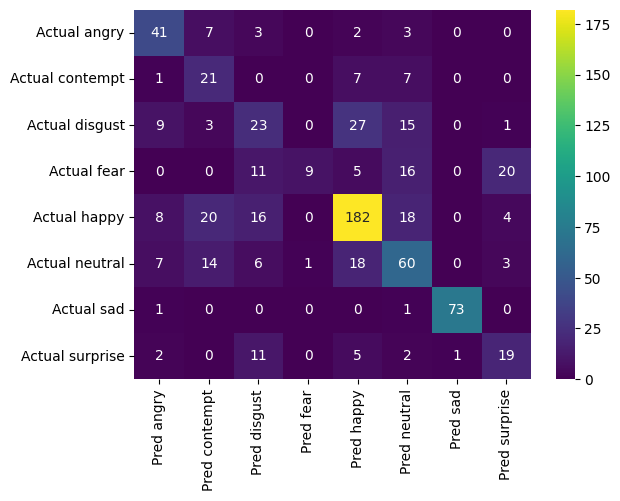

In [ ]:
plot(y_true, y_pred)

### **ContraCLIP_0205**
### **model_name='enet_b0_8_va_mtl'**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b0_8_va_mtl.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/ContraCLIP_0205"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[7]).split('.')[0])
        print((img_path.split('/')[7]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])

1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
27_angry
9_angry
10_angry
43_angry
55_angry
13_angry
61_angry
25_angry
44_angry
56_angry
18_angry
19_angry
26_angry
58_angry
57_angry
23_angry
24_angry
40_angry
59_angry
28_angry
29_angry
60_angry
31_angry
41_angry
33_angry
34_angry
35_angry
36_angry
42_angry
38_angry
39_angry
32_angry
37_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
53_angry
54_angry
22_angry
21_angry
20_angry
30_angry
62_angry
63_angry
1_contempt
2_contempt
3_contempt
4_contempt
5_contempt
6_contempt
7_contempt
8_contempt
9_contempt
10_contempt
11_contempt
12_contempt
13_contempt
14_contempt
15_contempt
16_contempt
17_contempt
18_contempt
19_contempt
20_contempt
21_contempt
22_contempt
23_contempt
24_contempt
25_contempt
26_contempt
27_contempt
28_contempt
29_contempt
30_contempt
31_contempt
32_contempt
33_contempt
34_contempt
35_contempt
36_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust (1)
44_disgust
51_dis

In [ ]:
with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l)-3] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l)-3]) == int(l[len(l)-1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l)-3])
      y_pred.append(l[len(l)-1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 41, 1: 12, 2: 16, 3: 1, 4: 195, 5: 68, 6: 73, 7: 21}
{0: 56, 1: 36, 2: 78, 3: 61, 4: 248, 5: 109, 6: 75, 7: 40}
ACCURACY PER CLASS
angry : 0.7321428571428571 41 56
contempt : 0.3333333333333333 12 36
disgust : 0.20512820512820512 16 78
fear : 0.01639344262295082 1 61
happy : 0.7862903225806451 195 248
neutral : 0.6238532110091743 68 109
sad : 0.9733333333333334 73 75
surprise : 0.525 21 40
ACCURACY
0.6073968705547653
[[ 41   4   2   0   3   6   0   0]
 [  1  12   0   0  16   6   0   1]
 [  8   0  16   0  30  24   0   0]
 [  0   0   4   1   9  26   0  21]
 [ 10   8   9   0 195  22   0   4]
 [  8   5   0   0  26  68   0   2]
 [  1   0   0   0   0   1  73   0]
 [  3   0   0   0  10   4   2  21]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

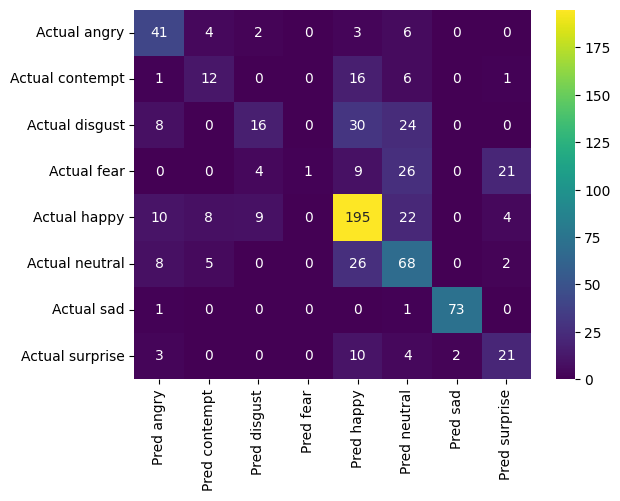

In [ ]:
plot(y_true, y_pred)

### **ContraCLIP_0205**
### **model_name='enet_b2_8'**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b2_8.pt Compose(
    Resize(size=(260, 260), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/ContraCLIP_0205"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[7]).split('.')[0])
        print((img_path.split('/')[7]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])

1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
27_angry
9_angry
10_angry
43_angry
55_angry
13_angry
61_angry
25_angry
44_angry
56_angry
18_angry
19_angry
26_angry
58_angry
57_angry
23_angry
24_angry
40_angry
59_angry
28_angry
29_angry
60_angry
31_angry
41_angry
33_angry
34_angry
35_angry
36_angry
42_angry
38_angry
39_angry
32_angry
37_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
53_angry
54_angry
22_angry
21_angry
20_angry
30_angry
62_angry
63_angry
1_contempt
2_contempt
3_contempt
4_contempt
5_contempt
6_contempt
7_contempt
8_contempt
9_contempt
10_contempt
11_contempt
12_contempt
13_contempt
14_contempt
15_contempt
16_contempt
17_contempt
18_contempt
19_contempt
20_contempt
21_contempt
22_contempt
23_contempt
24_contempt
25_contempt
26_contempt
27_contempt
28_contempt
29_contempt
30_contempt
31_contempt
32_contempt
33_contempt
34_contempt
35_contempt
36_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust (1)
44_disgust
51_dis

In [ ]:
with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)

In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l)-4] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l)-4]) == int(l[len(l)-1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/ContraCLIP_0205/prob_labels.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l)-4])
      y_pred.append(l[len(l)-1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 26, 1: 26, 2: 47, 3: 16, 4: 160, 5: 44, 6: 74, 7: 23}
{0: 56, 1: 36, 2: 78, 3: 61, 4: 248, 5: 109, 6: 75, 7: 40}
ACCURACY PER CLASS
angry : 0.4642857142857143 26 56
contempt : 0.7222222222222222 26 36
disgust : 0.6025641025641025 47 78
fear : 0.26229508196721313 16 61
happy : 0.6451612903225806 160 248
neutral : 0.4036697247706422 44 109
sad : 0.9866666666666667 74 75
surprise : 0.575 23 40
ACCURACY
0.5917496443812233
[[ 26  10  15   0   2   2   1   0]
 [  2  26   1   0   4   2   0   1]
 [  1   2  47   0  24   4   0   0]
 [  0   0   4  16   8  16   0  17]
 [  2  41  28   0 160  12   1   4]
 [  7  28   5   2  16  44   1   6]
 [  0   0   0   0   0   0  74   1]
 [  1   0   0   0  11   2   3  23]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

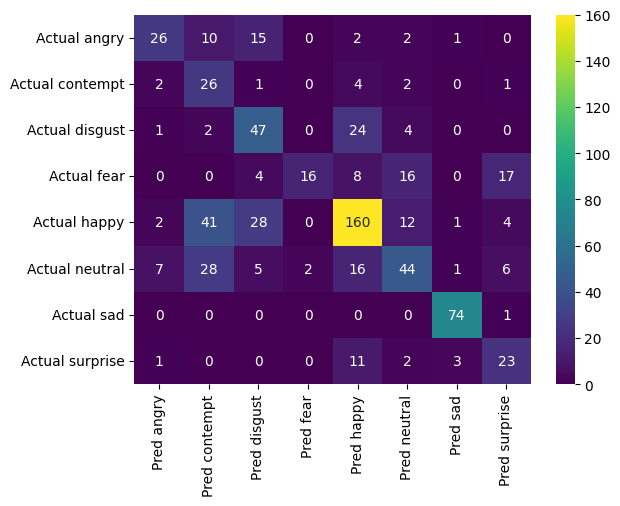

In [ ]:
plot(y_true, y_pred)

## **GANmut_0205 GAUSSIAN**

### **GANmut_0205**
### **model_name='enet_b0_8_best_vgaf''**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b0_8_best_vgaf.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
# переименовываем файлы из папок emotions, чтобы далее было удобно ставить labels

import os
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
emotions = ['angry', 'disgust', 'happy', 'neutral', 'sad', 'surprise', 'contempt', 'fear']

for folder in emotions:
  # print(folder)
  enumerate_ph = 0
  for filename in os.listdir(os.path.join(folder_contraclip, folder)):
    # print(filename)
    if os.path.isfile(os.path.join(folder_contraclip, folder, filename)):
      enumerate_ph += 1
      os.rename(os.path.join(folder_contraclip, folder, filename), os.path.join(folder_contraclip, folder, f'{enumerate_ph}_{folder}.jpg'))



In [ ]:
# заполняем список названий изображений, которые прошли детектор эмоций и в соответствующей строчке в файле .txt проставляем id эмоции (формируем множество y_pred)
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[8]).split('.')[0])
        print((img_path.split('/')[8]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])




1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
8_angry
9_angry
10_angry
11_angry
12_angry
13_angry
14_angry
15_angry
16_angry
17_angry
18_angry
19_angry
20_angry
21_angry
22_angry
23_angry
24_angry
25_angry
26_angry
30_angry
31_angry
32_angry
33_angry
34_angry
35_angry
36_angry
37_angry
38_angry
39_angry
40_angry
41_angry
42_angry
43_angry
28_angry
44_angry
45_angry
46_angry
1_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust
7_disgust
8_disgust
9_disgust
10_disgust
11_disgust
12_disgust
13_disgust
14_disgust
15_disgust
16_disgust
17_disgust
18_disgust
19_disgust
20_disgust
21_disgust
22_disgust
23_disgust
24_disgust
25_disgust
26_disgust
27_disgust
28_disgust
30_disgust
29_disgust
34_disgust
35_disgust
36_disgust
4_fear
5_fear
6_fear
7_fear
8_fear
9_fear
10_fear
11_fear
12_fear
13_fear
14_fear
15_fear
16_fear
17_fear
18_fear
19_fear
20_fear
21_fear
22_fear
23_fear
24_fear
25_fear
32_fear
3_fear
28_fear
30_fear
33_fear
39_fear
44_fear
45_fear
49_fear
2_fear


In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
with open("/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_vgaf.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:

with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_vgaf.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_vgaf.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l) - 2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l) - 2]) == int(l[len(l) - 1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_vgaf.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l) - 2])
      y_pred.append(l[len(l) - 1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 40, 1: 0, 2: 21, 3: 24, 4: 37, 5: 41, 6: 36, 7: 44}
{0: 44, 1: 1, 2: 33, 3: 42, 4: 37, 5: 42, 6: 36, 7: 45}
ACCURACY PER CLASS
angry : 0.9090909090909091 40 44
contempt : 0.0 0 1
disgust : 0.6363636363636364 21 33
fear : 0.5714285714285714 24 42
happy : 1.0 37 37
neutral : 0.9761904761904762 41 42
sad : 1.0 36 36
surprise : 0.9777777777777777 44 45
ACCURACY
0.8678571428571429
[[40  0  1  0  0  1  0  2]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0 12  0]
 [ 0  0  9 24  0  0  9  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  1  0  0  0 41  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  0  0 44]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

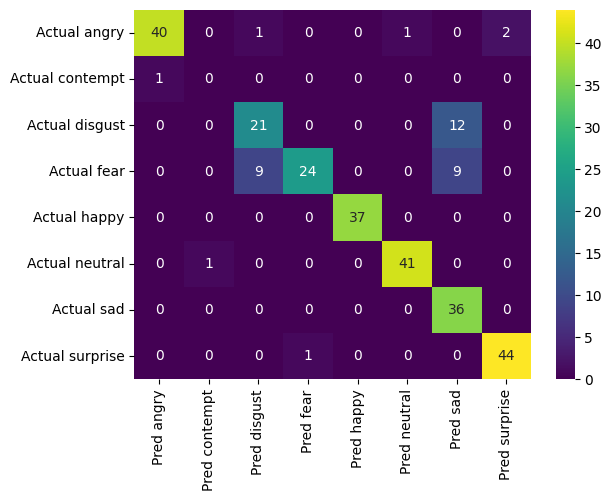

In [ ]:
plot(y_true, y_pred)

## **GANmut_0205**
### **model_name='enet_b0_8_va_mtl'**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b0_8_va_mtl.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[8]).split('.')[0])
        print((img_path.split('/')[8]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])

1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
8_angry
9_angry
10_angry
11_angry
12_angry
13_angry
14_angry
15_angry
16_angry
17_angry
18_angry
19_angry
20_angry
21_angry
22_angry
23_angry
24_angry
25_angry
26_angry
30_angry
31_angry
32_angry
33_angry
34_angry
35_angry
36_angry
37_angry
38_angry
39_angry
40_angry
41_angry
42_angry
43_angry
28_angry
44_angry
45_angry
46_angry
1_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust
7_disgust
8_disgust
9_disgust
10_disgust
11_disgust
12_disgust
13_disgust
14_disgust
15_disgust
16_disgust
17_disgust
18_disgust
19_disgust
20_disgust
21_disgust
22_disgust
23_disgust
24_disgust
25_disgust
26_disgust
27_disgust
28_disgust
30_disgust
29_disgust
34_disgust
35_disgust
36_disgust
4_fear
5_fear
6_fear
7_fear
8_fear
9_fear
10_fear
11_fear
12_fear
13_fear
14_fear
15_fear
16_fear
17_fear
18_fear
19_fear
20_fear
21_fear
22_fear
23_fear
24_fear
25_fear
32_fear
3_fear
28_fear
30_fear
33_fear
39_fear
44_fear
45_fear
49_fear
2_fear


In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
with open("/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_mtl.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:

with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_mtl.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_mtl.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l)-2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l)-2]) == int(l[len(l)-1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_mtl.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l)-2])
      y_pred.append(l[len(l)-1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 41, 1: 0, 2: 20, 3: 27, 4: 37, 5: 41, 6: 36, 7: 43}
{0: 44, 1: 1, 2: 33, 3: 42, 4: 37, 5: 44, 6: 36, 7: 45}
ACCURACY PER CLASS
angry : 0.9318181818181818 41 44
contempt : 0.0 0 1
disgust : 0.6060606060606061 20 33
fear : 0.6428571428571429 27 42
happy : 1.0 37 37
neutral : 0.9318181818181818 41 44
sad : 1.0 36 36
surprise : 0.9555555555555556 43 45
ACCURACY
0.8687943262411347
[[41  0  0  0  0  1  1  1]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0 13  0]
 [ 1  0  9 27  0  0  5  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  1  0  0  2 41  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  0  0  0  1  1  0 43]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

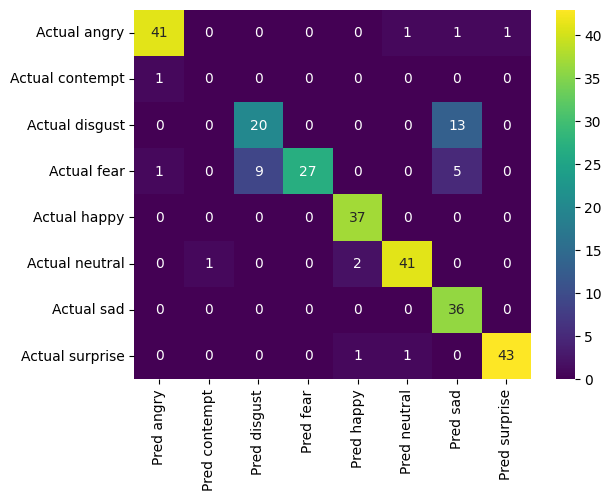

In [ ]:
plot(y_true, y_pred)

## **GANmut_0205**
### **model_name='enet_b2_8'**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b2_8.pt Compose(
    Resize(size=(260, 260), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[8]).split('.')[0])
        print((img_path.split('/')[8]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])

1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
8_angry
9_angry
10_angry
11_angry
12_angry
13_angry
14_angry
15_angry
16_angry
17_angry
18_angry
19_angry
20_angry
21_angry
22_angry
23_angry
24_angry
25_angry
26_angry
30_angry
31_angry
32_angry
33_angry
34_angry
35_angry
36_angry
37_angry
38_angry
39_angry
40_angry
41_angry
42_angry
43_angry
28_angry
44_angry
45_angry
46_angry
1_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust
7_disgust
8_disgust
9_disgust
10_disgust
11_disgust
12_disgust
13_disgust
14_disgust
15_disgust
16_disgust
17_disgust
18_disgust
19_disgust
20_disgust
21_disgust
22_disgust
23_disgust
24_disgust
25_disgust
26_disgust
27_disgust
28_disgust
30_disgust
29_disgust
34_disgust
35_disgust
36_disgust
4_fear
5_fear
6_fear
7_fear
8_fear
9_fear
10_fear
11_fear
12_fear
13_fear
14_fear
15_fear
16_fear
17_fear
18_fear
19_fear
20_fear
21_fear
22_fear
23_fear
24_fear
25_fear
32_fear
3_fear
28_fear
30_fear
33_fear
39_fear
44_fear
45_fear
49_fear
2_fear


In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/gaussan"
with open("/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_b2.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:

with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_b2.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_b2.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l)-2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l)-2]) == int(l[len(l)-1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/GANmut_0205/gaussan/labels_b2.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l)-2])
      y_pred.append(l[len(l)-1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 32, 1: 0, 2: 16, 3: 29, 4: 37, 5: 34, 6: 36, 7: 37}
{0: 44, 1: 1, 2: 33, 3: 42, 4: 37, 5: 44, 6: 36, 7: 45}
ACCURACY PER CLASS
angry : 0.7272727272727273 32 44
contempt : 0.0 0 1
disgust : 0.48484848484848486 16 33
fear : 0.6904761904761905 29 42
happy : 1.0 37 37
neutral : 0.7727272727272727 34 44
sad : 1.0 36 36
surprise : 0.8222222222222222 37 45
ACCURACY
0.7836879432624113
[[32  1  3  1  0  3  3  1]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0 17  0]
 [ 0  0  8 29  0  0  5  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  7  1  0  1 34  1  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  2  0  1  3  2  0 37]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

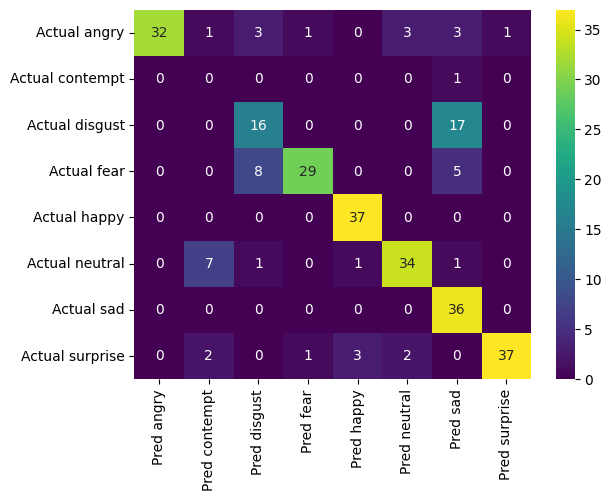

In [ ]:
plot(y_true, y_pred)

# **GANmut LINEAR**

### **GANmut_0205**
### **model_name='enet_b0_8_best_vgaf''**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b0_8_best_vgaf.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
# переименовываем файлы из папок emotions, чтобы далее было удобно ставить labels

import os
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
emotions = ['angry', 'disgust', 'happy', 'neutral', 'sad', 'surprise', 'contempt', 'fear']

for folder in emotions:
  # print(folder)
  enumerate_ph = 0
  for filename in os.listdir(os.path.join(folder_contraclip, folder)):
    # print(filename)
    if os.path.isfile(os.path.join(folder_contraclip, folder, filename)):
      enumerate_ph += 1
      os.rename(os.path.join(folder_contraclip, folder, filename), os.path.join(folder_contraclip, folder, f'{enumerate_ph}_{folder}.jpg'))



In [ ]:
# заполняем список названий изображений, которые прошли детектор эмоций и в соответствующей строчке в файле .txt проставляем id эмоции (формируем множество y_pred)
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[8]).split('.')[0])
        print((img_path.split('/')[8]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])




1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
8_angry
9_angry
10_angry
11_angry
12_angry
13_angry
14_angry
15_angry
16_angry
17_angry
18_angry
19_angry
20_angry
21_angry
22_angry
23_angry
24_angry
25_angry
26_angry
27_angry
28_angry
29_angry
30_angry
31_angry
32_angry
33_angry
34_angry
35_angry
36_angry
37_angry
38_angry
39_angry
40_angry
41_angry
43_angry
44_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
42_angry
1_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust
7_disgust
8_disgust
9_disgust
10_disgust
11_disgust
12_disgust
13_disgust
14_disgust
15_disgust
16_disgust
17_disgust
18_disgust
19_disgust
20_disgust
21_disgust
22_disgust
23_disgust
24_disgust
25_disgust
26_disgust
27_disgust
28_disgust
29_disgust
30_disgust
31_disgust
32_disgust
33_disgust
34_disgust
35_disgust
36_disgust
37_disgust
38_disgust
39_disgust
40_disgust
41_disgust
42_disgust
43_disgust
44_disgust
45_disgust
46_disgust
47_disgust
48_disgust
49_disgust


In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
with open("/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_vgaf2.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:

with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_vgaf2.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_vgaf2.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l) - 2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l) - 2]) == int(l[len(l) - 1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_vgaf2.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l) - 2])
      y_pred.append(l[len(l) - 1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 36, 1: 0, 2: 51, 3: 49, 4: 50, 5: 0, 6: 59, 7: 41}
{0: 52, 1: 1, 2: 70, 3: 63, 4: 71, 5: 1, 6: 70, 7: 70}
ACCURACY PER CLASS
angry : 0.6923076923076923 36 52
contempt : 0.0 0 1
disgust : 0.7285714285714285 51 70
fear : 0.7777777777777778 49 63
happy : 0.704225352112676 50 71
neutral : 0.0 0 1
sad : 0.8428571428571429 59 70
surprise : 0.5857142857142857 41 70
ACCURACY
0.7185929648241206
[[36  0 13  0  1  1  1  0]
 [ 1  0  0  0  0  0  0  0]
 [ 8  0 51  1  1  1  8  0]
 [ 2  0  4 49  1  2  0  5]
 [ 0  6  4  3 50  5  0  3]
 [ 0  0  0  0  1  0  0  0]
 [ 3  0  1  3  3  1 59  0]
 [ 1  1  1 13  5  5  3 41]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

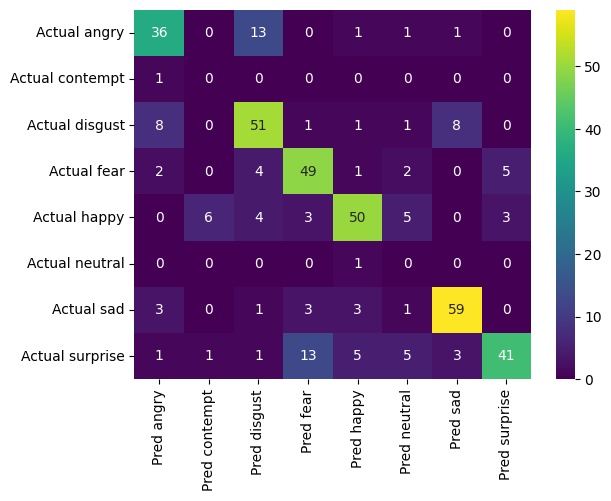

In [ ]:
plot(y_true, y_pred)

## **GANmut_0205**
### **model_name='enet_b0_8_va_mtl'**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b0_8_va_mtl.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[8]).split('.')[0])
        print((img_path.split('/')[8]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])

1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
8_angry
9_angry
10_angry
11_angry
12_angry
13_angry
14_angry
15_angry
16_angry
17_angry
18_angry
19_angry
20_angry
21_angry
22_angry
23_angry
24_angry
25_angry
26_angry
27_angry
28_angry
29_angry
30_angry
31_angry
32_angry
33_angry
34_angry
35_angry
36_angry
37_angry
38_angry
39_angry
40_angry
41_angry
43_angry
44_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
42_angry
1_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust
7_disgust
8_disgust
9_disgust
10_disgust
11_disgust
12_disgust
13_disgust
14_disgust
15_disgust
16_disgust
17_disgust
18_disgust
19_disgust
20_disgust
21_disgust
22_disgust
23_disgust
24_disgust
25_disgust
26_disgust
27_disgust
28_disgust
29_disgust
30_disgust
31_disgust
32_disgust
33_disgust
34_disgust
35_disgust
36_disgust
37_disgust
38_disgust
39_disgust
40_disgust
41_disgust
42_disgust
43_disgust
44_disgust
45_disgust
46_disgust
47_disgust
48_disgust
49_disgust


In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
with open("/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_mtll2.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:

with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_mtll2.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_mtll2.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l)-2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l)-2]) == int(l[len(l)-1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_mtll2.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l)-2])
      y_pred.append(l[len(l)-1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 37, 1: 0, 2: 57, 3: 40, 4: 58, 5: 0, 6: 54, 7: 45}
{0: 52, 1: 1, 2: 70, 3: 63, 4: 71, 5: 1, 6: 70, 7: 70}
ACCURACY PER CLASS
angry : 0.7115384615384616 37 52
contempt : 0.0 0 1
disgust : 0.8142857142857143 57 70
fear : 0.6349206349206349 40 63
happy : 0.8169014084507042 58 71
neutral : 0.0 0 1
sad : 0.7714285714285715 54 70
surprise : 0.6428571428571429 45 70
ACCURACY
0.7311557788944724
[[37  0 12  0  1  2  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 7  0 57  1  1  1  3  0]
 [ 7  0  6 40  2  1  1  6]
 [ 1  4  3  2 58  2  0  1]
 [ 0  0  0  0  1  0  0  0]
 [ 5  0  2  2  6  1 54  0]
 [ 3  0  2  1  8  8  3 45]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

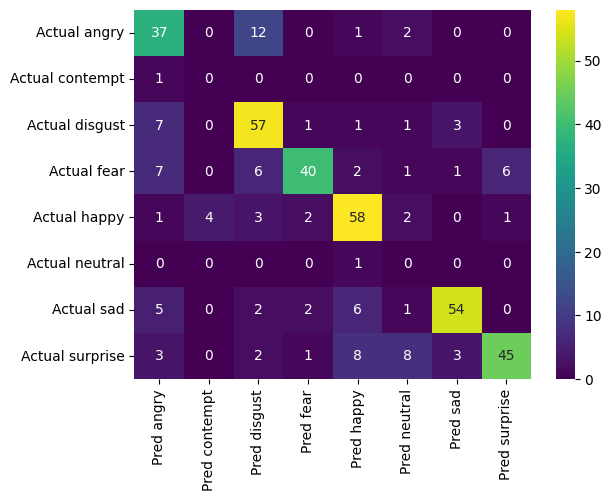

In [ ]:
plot(y_true, y_pred)

## **GANmut_0205**
### **model_name='enet_b2_8'**

In [ ]:
from hsemotion.facial_emotions import HSEmotionRecognizer
# model_name='enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/root/.hsemotion/enet_b2_8.pt Compose(
    Resize(size=(260, 260), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
em = []
emotions_fer = {'Anger': 0, 'Contempt': 1, 'Disgust': 2, 'Fear': 3, 'Happiness': 4, 'Neutral': 5, 'Sadness': 6, 'Surprise': 7}

emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
face_img_list = []
img_paths_accord = []

for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      # print(emotion_path)
      fnames_path = [os.path.join(emotion_path, fname) for fname in os.listdir(emotion_path)]
      for img_path in fnames_path:
        frame_bgr = cv2.imread(img_path)
        # print(img_path)

        img_paths_accord.append((img_path.split('/')[8]).split('.')[0])
        print((img_path.split('/')[8]).split('.')[0])
        # print((img_path.split('/')[7]).split('.')[0])
        frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        bounding_boxes=detect_face(frame)
        for bbox in bounding_boxes:
            box = bbox.astype(int)
            x1,y1,x2,y2=box[0:4]
            face_img=frame[y1:y2,x1:x2,:]
            emotion,scores=fer.predict_emotions(face_img,logits=True)
            em.append(emotion)
# for bbox in bounding_boxes:
#     box = bbox.astype(int)
#     x1,y1,x2,y2=box[0:4]
#     face_img=frame[y1:y2,x1:x2,:]
print(em[0:5])

1_angry
2_angry
3_angry
4_angry
5_angry
6_angry
7_angry
8_angry
9_angry
10_angry
11_angry
12_angry
13_angry
14_angry
15_angry
16_angry
17_angry
18_angry
19_angry
20_angry
21_angry
22_angry
23_angry
24_angry
25_angry
26_angry
27_angry
28_angry
29_angry
30_angry
31_angry
32_angry
33_angry
34_angry
35_angry
36_angry
37_angry
38_angry
39_angry
40_angry
41_angry
43_angry
44_angry
45_angry
46_angry
47_angry
48_angry
49_angry
50_angry
51_angry
52_angry
42_angry
1_contempt
1_disgust
2_disgust
3_disgust
4_disgust
5_disgust
6_disgust
7_disgust
8_disgust
9_disgust
10_disgust
11_disgust
12_disgust
13_disgust
14_disgust
15_disgust
16_disgust
17_disgust
18_disgust
19_disgust
20_disgust
21_disgust
22_disgust
23_disgust
24_disgust
25_disgust
26_disgust
27_disgust
28_disgust
29_disgust
30_disgust
31_disgust
32_disgust
33_disgust
34_disgust
35_disgust
36_disgust
37_disgust
38_disgust
39_disgust
40_disgust
41_disgust
42_disgust
43_disgust
44_disgust
45_disgust
46_disgust
47_disgust
48_disgust
49_disgust


In [ ]:
# формируем файл .txt, в котором будет: название файла __ label
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
folder_contraclip = "/content/gdrive/MyDrive/uni/GANmut_0205/linear"
with open("/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_b22.txt", "w") as f:
    for folder in emotions_label.keys():
      emotion_path = os.path.join(folder_contraclip, folder)
      for filename in os.listdir(emotion_path):
        if os.path.isfile(os.path.join(emotion_path, filename)):
          f.write(str(filename.split('.')[0]) + ' ' + str(emotions_label.get(folder)) + '\n')

In [ ]:

with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_b22.txt', 'r+') as file:
  lines = file.readlines()  # читаем все строки из файла
  file.seek(0)  # перемещаем указатель в начало файла
  for i in range(0, len(img_paths_accord)):
    for line in lines:
      if line.split(' ')[0] == img_paths_accord[i]:
        line = line.strip() + f' {emotions_fer.get(em[i])}\n' # добавляем текст в конец строки
        file.write(line)


FileNotFoundError: ignored

In [ ]:
"""
1. Подсчитать количество правильно распознанных эмоций
(True Positives) и неправильно распознанных эмоций
(False Positives) для каждого класса.

2. Сложить количество правильно распознанных эмоций
для всех классов и получить общее количество правильно распознанных эмоций.

3. Сложить количество неправильно распознанных эмоций для всех классов
и получить общее количество неправильно распознанных эмоций.

4. Рассчитать accuracy как отношение общего количества
правильно распознанных эмоций к общему количеству эмоций в наборе данных.

Формула для расчета accuracy:

accuracy = (TP1 + TP2 + ... + TPn) / (TP1 + TP2 + ... + TPn + FP1 + FP2 + ... + FPn)

где TP - количество правильно распознанных эмоций для каждого класса,
FP - количество неправильно распознанных эмоций для каждого класса, n - количество классов.
"""
emotions_label={'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}
correct_per_class = {emotion: 0 for emotion in emotions_label.values()}
total_per_class = {emotion: 0 for emotion in emotions_label.values()}



with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_b22.txt', 'r') as file:
  lines = file.readlines()
  for em in emotions_label.values():
    for line in lines:
      l = line.split(' ')
      # print(em)
      # print('line_split', l[1])
      # print(line.split(' ')[1] == str(em))
      if l[len(l)-2] == str(em):
        total_per_class[em] += 1
      # print(int(line.split(' ')[1]) == int(line.split(' ')[2]), 'line1=', line.split(' ')[1], 'line2=', line.split(' ')[2])
      if int(l[len(l)-2]) == int(l[len(l)-1]) == em:
        correct_per_class[em] += 1


print(correct_per_class)
print(total_per_class)
print('ACCURACY PER CLASS')
for em, correct, total in zip(emotions_label.keys(), correct_per_class.values(), total_per_class.values()):
  print(em, ':', correct/total, correct, total)

print('ACCURACY')
total, correctly = 0, 0
for values, correct in zip(total_per_class.values(), correct_per_class.values()):
  total += values
  correctly +=correct
print(correctly/total)


# CONFUSION MATRIX
y_true = []
y_pred = []
with open('/content/gdrive/MyDrive/uni/GANmut_0205/linear/labels_b22.txt', 'r') as file:
  lines = file.readlines()
  for line in lines:
      l = line.split(' ')
      y_true.append(l[len(l)-2])
      y_pred.append(l[len(l)-1].split("\n")[0])
# print(y_true)
# print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

{0: 22, 1: 0, 2: 61, 3: 49, 4: 47, 5: 0, 6: 61, 7: 35}
{0: 52, 1: 1, 2: 70, 3: 63, 4: 71, 5: 1, 6: 70, 7: 70}
ACCURACY PER CLASS
angry : 0.4230769230769231 22 52
contempt : 0.0 0 1
disgust : 0.8714285714285714 61 70
fear : 0.7777777777777778 49 63
happy : 0.6619718309859155 47 71
neutral : 0.0 0 1
sad : 0.8714285714285714 61 70
surprise : 0.5 35 70
ACCURACY
0.6909547738693468
[[22  1 27  0  1  1  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 2  0 61  0  2  1  4  0]
 [ 1  0  9 49  3  0  0  1]
 [ 0 15  4  2 47  1  1  1]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  4  1  3  1 61  0]
 [ 0  3  5  8  9  7  3 35]]


In [ ]:
# вытаскиваем уникальные labels
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
unique_labels(y_true)

def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Pred {emotion}' for emotion in emotions_label.keys()]
  idx = [f'Actual {emotion}' for emotion in emotions_label.keys()]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=idx)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


<Axes: >

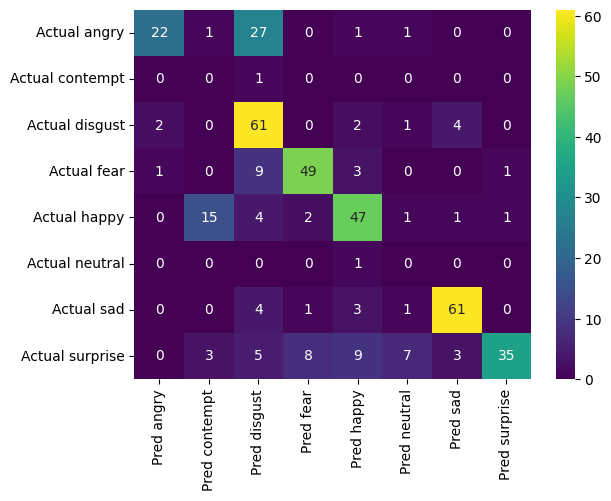

In [ ]:
plot(y_true, y_pred)